## WeatherPy

Three observable trends based on data:
- Maximum temperatures of a city based on its latitude has a strong linear correlation and is more reflective in the Northern than Southern hemisphere. 
- There is no linear relationship between a city's latitude and wind speed, humidity, or cloudiness. 
- However, higher wind speeds can be seen at latitudes furthest from the equator as seen on the scatterplot "Latitude vs Wind Speed." 

In [1]:
# Import dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from scipy.stats import linregress

# Import citipy to determine city's coordinates of latitude and longitude 
from citipy import citipy

# Import API key
from api_keys import weather_api_key

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count of greater than 500 
len(cities)


602

### Perform API Calls

In [3]:
# Base urls 
base_url = "http://api.openweathermap.org/data/2.5/weather?" 
query_url = f'{base_url}&appid={weather_api_key}&units=imperial&q='

# Set initial counter 
counter = 0 

# Create empty lists to add with info from API requests 
city_list = [ ]
lat_list = [ ] 
lng_list = [ ] 
weather_list= [ ] 
temp_list = [ ] 
humidity_list = [ ] 
wind_list = [ ] 
cloudy_list = [ ] 
country_list = [ ] 
date_list = [ ] 

print('Beginning Data Retrieval')
print('----------------------------')

# Loop through all cities 
# Perform a weather check on each city using a series of successive API calls
for city in cities:

    counter = counter + 1 
    try:
        data = requests.get(query_url+city).json()
        city_list.append(data['name'])
        lng_list.append(data['coord']['lon'])   
        lat_list.append(data['coord']['lat'])
        weather_list.append(data['weather'][0]['description'])
        temp_list.append(data['main']['temp_max'])
        humidity_list.append(data['main']['humidity'])
        wind_list.append(data['wind']['speed'] )
        cloudy_list.append(data['clouds']['all'])
        country_list.append(data['sys']['country'])
        date_list.append(data['dt'])

        # Include a print log of each city as it is being processed (with the city number and city name).
        print(f'Processing Record {counter}|{city}')  

    except: 
        print('City not found. Skipping...')
        
print('Data Retrieval Complete')
           

Beginning Data Retrieval
----------------------------
Processing Record 1|mataura
Processing Record 2|fukue
Processing Record 3|vaini
Processing Record 4|punta arenas
Processing Record 5|buta
City not found. Skipping...
Processing Record 7|sao filipe
Processing Record 8|rikitea
Processing Record 9|chuy
City not found. Skipping...
Processing Record 11|faya
Processing Record 12|hobart
Processing Record 13|asau
Processing Record 14|aklavik
Processing Record 15|remanso
Processing Record 16|bambous virieux
Processing Record 17|nhulunbuy
Processing Record 18|hilo
City not found. Skipping...
Processing Record 20|thompson
Processing Record 21|caravelas
Processing Record 22|parabel
Processing Record 23|barrow
Processing Record 24|khyriv
Processing Record 25|zhob
Processing Record 26|faanui
Processing Record 27|acajutla
Processing Record 28|kruisfontein
Processing Record 29|nikolskoye
Processing Record 30|hermanus
Processing Record 31|muravlenko
Processing Record 32|aracati
Processing Record 33|

Processing Record 267|sorland
City not found. Skipping...
Processing Record 269|kawalu
Processing Record 270|bethel
City not found. Skipping...
Processing Record 272|labuhan
Processing Record 273|torbay
Processing Record 274|samarkand
Processing Record 275|lorengau
Processing Record 276|ende
Processing Record 277|vigia
Processing Record 278|porto novo
Processing Record 279|juneau
Processing Record 280|posse
Processing Record 281|ankazoabo
Processing Record 282|saskylakh
City not found. Skipping...
Processing Record 284|kusu
Processing Record 285|grand forks
Processing Record 286|sayansk
City not found. Skipping...
Processing Record 288|kolpashevo
Processing Record 289|dolinsk
Processing Record 290|arlit
Processing Record 291|tongzi
Processing Record 292|salalah
Processing Record 293|sita road
Processing Record 294|yichun
Processing Record 295|avera
Processing Record 296|college
Processing Record 297|rocha
Processing Record 298|paveh
Processing Record 299|tautira
Processing Record 300|k

Processing Record 534|anori
Processing Record 535|laguna
Processing Record 536|auki
Processing Record 537|palmerston
City not found. Skipping...
Processing Record 539|itaparica
Processing Record 540|kolchugino
Processing Record 541|nabire
Processing Record 542|luderitz
Processing Record 543|suntar
Processing Record 544|pavlodar
Processing Record 545|dakar
Processing Record 546|ust-nera
Processing Record 547|daru
Processing Record 548|tabou
Processing Record 549|yazd
Processing Record 550|bobo dioulasso
Processing Record 551|gigmoto
Processing Record 552|bontang
Processing Record 553|shaoyang
Processing Record 554|khandyga
Processing Record 555|praia da vitoria
Processing Record 556|edd
Processing Record 557|skovorodino
Processing Record 558|alakurtti
Processing Record 559|chitrakonda
Processing Record 560|teahupoo
Processing Record 561|naantali
Processing Record 562|havre-saint-pierre
Processing Record 563|edzell
Processing Record 564|lamu
Processing Record 565|beloha
Processing Record

### Convert Raw Data to DataFrame

In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data = pd.DataFrame({ 
                "City" : city_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudy_list,
                "Wind Speed" : wind_list,
                "Country" : country_list,
                "Date" : date_list,

})

In [5]:
# Show Record Count
city_data.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [6]:
# Display the City Data Frame
city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.19,168.86,48.99,80,59,14.00,NZ,1603122785
1,Fukuechō,32.69,128.84,68.59,69,51,19.98,JP,1603122786
2,Vaini,-21.20,-175.20,69.80,77,20,9.17,TO,1603122786
3,Punta Arenas,-53.15,-70.92,42.80,61,40,32.21,CL,1603122729
4,Buta,2.79,24.73,76.12,92,100,0.72,CD,1603122786


In [7]:
# Export to csv file  
city_data.to_csv('../output_data/City_Data.csv')

### Inspect the data and remove the cities where the humidity > 100%.

- Skipping this step. There are no cities that have humidity > 100%.

In [9]:
#Specifically, look for max humidity >100% to determine further analysis
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,20.305801,17.372402,61.876797,71.225979,54.176157,8.184128,1.603123e+09
std,33.091630,89.678182,22.027196,21.726886,37.571312,5.918437,1.490943e+02
min,-54.800000,-175.200000,3.600000,8.000000,0.000000,0.220000,1.603122e+09
25%,-6.955000,-59.895000,43.040000,62.000000,20.000000,3.772500,1.603123e+09
50%,22.140000,21.985000,66.200000,76.000000,63.000000,6.980000,1.603123e+09
75%,50.090000,95.320000,79.650000,87.000000,90.000000,10.677500,1.603123e+09
max,78.220000,178.420000,105.800000,100.000000,100.000000,45.520000,1.603123e+09


### Latitude vs. Temperature Plot

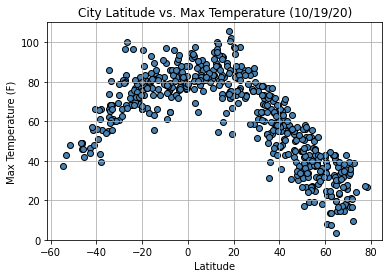

In [13]:
# Build scatter plot for latitude vs. maximum temperature
x_values = city_data['Lat']
y_values = city_data['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors='black', color ='steelblue')
plt.title('City Latitude vs. Max Temperature (10/19/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.ylim(0,110);

# Save the figure
plt.savefig('../output_Data/Fig1_WeatherPy.png')

# Show plot
plt.show()


### Analysis: Latitude vs Temperature Plot
In the code and plot above, we are creating a scatter plot of latitude vs the maximum temperature of each city in our sample. 
There appears to be a n-shaped relationship/trend between the latitude coordinates and the max temperature of cities. 
As the city latitude approaches the equator, the maximum temperature(F) increases and consequently, decreases as it moves away from the equator.  
Thus, cities with the higher or warmer temperatures will be located closer to the equator. 

### Latitude vs. Humidity Plot

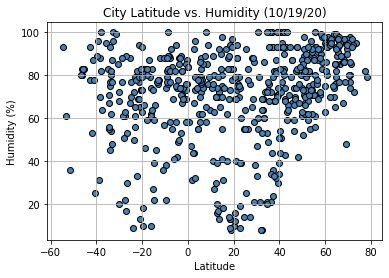

In [14]:
# Build scatter plot for latitude vs. humidity
x_values = city_data['Lat']
y_values = city_data['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors='black', color ='steelblue')
plt.title('City Latitude vs. Humidity (10/19/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig('../output_Data/Fig2_WeatherPy.png')

# Show plot
plt.show()

### Analysis: Latitude vs Humidity Plot
In the code and plot above, we are creating a scatter plot of latitude vs humidity of each city in our sample. 
There is no strong correlation between the latitude coordinates and the humidity percentage of cities. 
Based on the plot, most points appear above the 50% mark which can portray that most ciites in our sample have humidity>50%. 

### Latitude vs. Cloudiness Plot

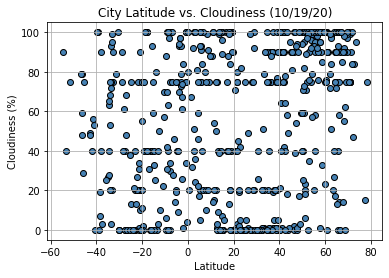

In [16]:
# Build scatter plot for latitude vs. cloudiness 
x_values = city_data['Lat']
y_values = city_data['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors='black', color ='steelblue')
plt.title('City Latitude vs. Cloudiness (10/19/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig('../output_Data/Fig3_WeatherPy.png')

# Show plot
plt.show()


### Analysis: Latitude vs Cloudiness Plot
In the code and plot above, we are creating a scatter plot of latitude vs cloudiness (%) of each city in our sample. 
Again, there is no strong correlation between the latitude coordinates and the cloudiness percentage of cities. 

### Latitude vs. Wind Speed Plot

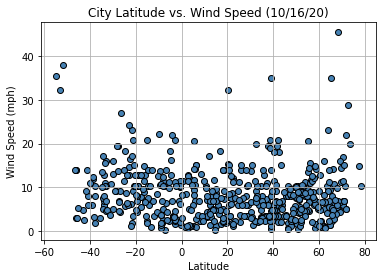

In [17]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data['Lat']
y_values = city_data['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values, y_values, edgecolors='black', color ='steelblue')
plt.title('City Latitude vs. Wind Speed (10/16/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save the figure
plt.savefig('../output_Data/Fig4_WeatherPy.png')

# Show plot
plt.show()


### Analysis: Latitude vs Wind Speed Plot
In the code and plot above, we are creating a scatter plot of latitude vs wind speed of each city in our sample. 
Most wind speeds are below 20mph. However, there appears to be outliers more prevalent on both ends of the scatterplot representing higher wind speeds seen closer to the north/south poles.

### Linear Regression

In [18]:
# Create a function to create Linear Regression plots
def linregplot (x_values, y_values, xlab, ylab, xstart, ystart):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is: {rvalue**2}.')
    
    # Plot scatter plot 
    plt.scatter(x_values, y_values, color = 'steelblue')
    plt.plot(x_values, regress_values, 'r-', color = 'red')
    plt.annotate(line_eq, (xstart, ystart), fontsize=15, color = 'red')

    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
north = city_data.loc[city_data["Lat"]>=0]
south = city_data.loc[city_data["Lat"]<0]
north.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Fukuechō,32.69,128.84,68.59,69,51,19.98,JP,1603122786
4,Buta,2.79,24.73,76.12,92,100,0.72,CD,1603122786
5,São Filipe,14.90,-24.50,81.95,75,7,8.75,CV,1603122786
8,Faya,18.39,42.45,71.60,13,20,13.87,SA,1603122786
10,Asău,46.43,26.40,53.60,54,2,10.29,RO,1603122787


### Max Temp vs. Latitude Linear Regression

The r-value is: 0.8023182538378806.


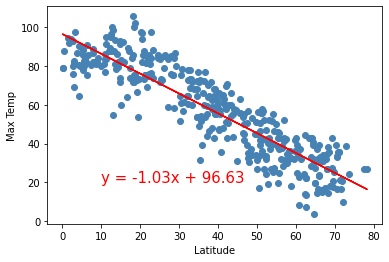

In [20]:
# Linear regression on Northern Hemisphere
linregplot(north['Lat'], north['Max Temp'], 'Latitude', 'Max Temp', 10, 20)

The r-value is: 0.4989352063891.


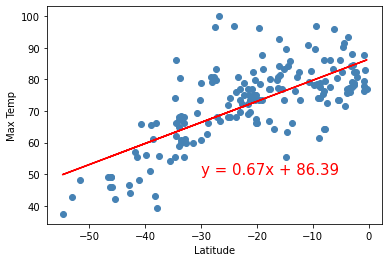

In [23]:
# Linear regression on Southern Hemisphere
linregplot(south['Lat'], south['Max Temp'], 'Latitude', 'Max Temp', -30, 50)

### Analysis of Max Temp vs. Latitude Linear Regression
The linear regressions in the two latter plots above show a possible linear relationship between latitude and max temperature divided per hemispheres. 
There is a stronger correlation between the city's latitude and its maximum temperature in the northern hemisphere with a r value of 0.8 in comparison to the southern hemisphere with a r value of 0.5.
Therefore, there is a stronger linear relationship that the further you are from the equator in the northern hemisphere, the rate of change will decrease at a rate of 1.03 per degree of latitude. In the southern hemisphere, there is a weaker linear prediction that for every increase latitude in degrees, the rate of temperature change will increase by 0.67 in fahrenheit. 


### Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1408788644859474.


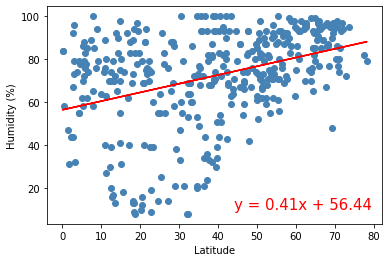

In [31]:
# Northern Hemisphere
linregplot(north['Lat'], north['Humidity'], 'Latitude', 'Humidity (%)', 44, 10)

The r-value is: 2.1908283477149334e-05.


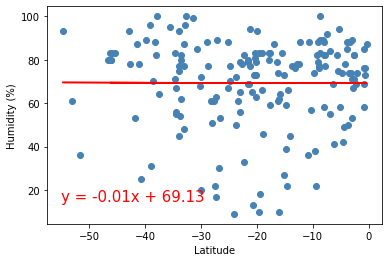

In [34]:
# Southern Hemisphere
linregplot(south['Lat'], south['Humidity'], 'Latitude', 'Humidity (%)', -55, 15)

### Analysis of Humidity (%) vs. Latitude Linear Regression
The linear regressions in the two plots above show the linear relationship between latitude and humidity per hemispheres. 
There are weak correlations between the latitude of the city and the humidity in the northern and southern hemisphere; r value is 0.14 and 2.19e-5 respectively. 
Therefore, there is no linear trend that shows an accurate rate of change of humidity in comparison to latitude coordinates in either hemispheres. 


### Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06313857282021376.


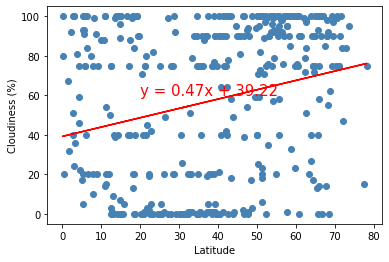

In [35]:
linregplot(north['Lat'], north['Cloudiness'], 'Latitude', 'Cloudiness (%)', 20, 60)

The r-value is: 0.005794046492829124.


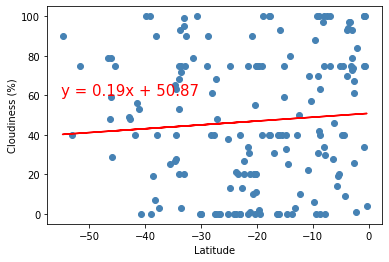

In [36]:
# Southern Hemisphere
linregplot(south['Lat'], south['Cloudiness'], 'Latitude', 'Cloudiness (%)', -55, 60)

### Analysis of Cloudiness (%) vs. Latitude Linear Regression
The linear regressions in the two plots above show the linear relationship between latitude and cloudiness per hemispheres. 
There are weak correlations between the latitude of the city and the cloudiness in the northern and southern hemisphere; r value is 0.063 and 0.0058 respectively. 
Therefore, the change in latitude of a city in the northern and southern hemisphere cannot predict a change in cloudiness. 

### Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.009729857263549345.


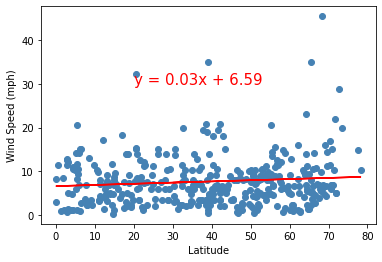

In [37]:
# Northern Hemisphere
linregplot(north['Lat'], north['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 20, 30)

The r-value is: 0.07820264534653099.


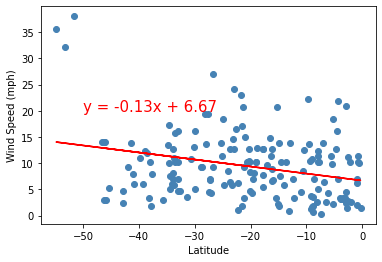

In [38]:
# Southern Hemisphere
linregplot(south['Lat'], south['Wind Speed'], 'Latitude', 'Wind Speed (mph)', -50, 20)

### Analysis of Wind Speed (mph) vs. Latitude Linear Regression
The linear regressions in the two plots above show the linear relationship between latitude and wind speed per hemispheres. 
There are weak correlations between the latitude of the city and the wind speed in the northern and southern hemisphere; r value is 0.0097 and 0.078 respectively. 
Therefore, the change in latitude of a city in the northern and southern hemisphere cannot predict a change in wind speed. 